# Code Jam Pudding Notebook

 In this notebook, I will document the full workflow of our Code Jam project, from preprocessing and exploratory analysis to model training and evaluation. It also includes a prediction function and visualizations to interpret model performance and insights from the Spotify dataset.

In [550]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import joblib

In [551]:
df = pd.read_csv("SpotifyFeatures.csv", low_memory=False)

In [552]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


# Preprocessing & Results

In this section, I check the dataset for missing and duplicate values to ensure data quality. Cleaning these issues is a crucial first step before moving on to feature selection and modeling.

In [553]:
print("Missing values:", df.isnull().sum().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values: 1
Duplicate rows: 0


In [554]:
print("Duplicate track IDs:", df['track_id'].duplicated().sum())
df = df.drop_duplicates(subset='track_id')
df.info()

Duplicate track IDs: 55951
<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   artist_name       176774 non-null  object 
 2   track_name        176773 non-null  object 
 3   track_id          176774 non-null  object 
 4   popularity        176774 non-null  int64  
 5   acousticness      176774 non-null  float64
 6   danceability      176774 non-null  float64
 7   duration_ms       176774 non-null  int64  
 8   energy            176774 non-null  float64
 9   instrumentalness  176774 non-null  float64
 10  key               176774 non-null  object 
 11  liveness          176774 non-null  float64
 12  loudness          176774 non-null  float64
 13  mode              176774 non-null  object 
 14  speechiness       176774 non-null  float64
 15  tempo             176774 non-null  float64
 16

In [555]:
df['track_name'].isna().value_counts()

track_name
False    176773
True          1
Name: count, dtype: int64

In [556]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,176774.000000,176774.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000
mean,36.273162,0.404135,0.541068,2.361272e+05,0.557025,0.172073,0.224531,-10.137605,0.127395,117.203679,0.451595
std,17.391016,0.366302,0.190387,1.305132e+05,0.275839,0.322936,0.211027,6.395551,0.204345,31.325091,0.267820
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,0.097500,-12.851000,0.036800,92.006000,0.222000
50%,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,0.130000,-8.191000,0.049400,115.006500,0.440000
75%,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,0.277000,-5.631000,0.102000,138.799750,0.667000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [557]:
df[df['track_name'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   artist_name       176774 non-null  object 
 2   track_name        176773 non-null  object 
 3   track_id          176774 non-null  object 
 4   popularity        176774 non-null  int64  
 5   acousticness      176774 non-null  float64
 6   danceability      176774 non-null  float64
 7   duration_ms       176774 non-null  int64  
 8   energy            176774 non-null  float64
 9   instrumentalness  176774 non-null  float64
 10  key               176774 non-null  object 
 11  liveness          176774 non-null  float64
 12  loudness          176774 non-null  float64
 13  mode              176774 non-null  object 
 14  speechiness       176774 non-null  float64
 15  tempo             176774 non-null  float64
 16  time_signature    176774 

The dataset contains one missing track name, which is not meaningful for our analysis. Since track name does not correlate with popularity, we can safely ignore this missing value.

# Exploratory Data Analysis (EDA)

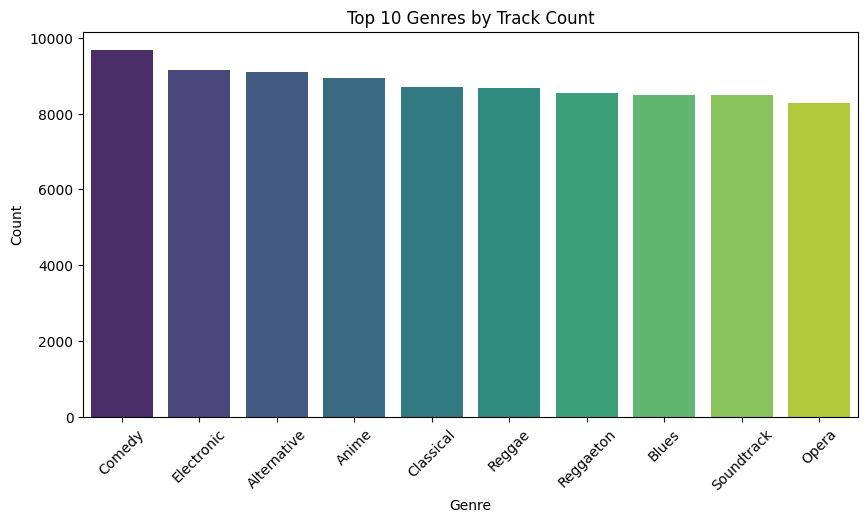

In [558]:
top_genres = df['genre'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis', hue=top_genres.index, legend=False)
plt.title('Top 10 Genres by Track Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here I created a bar chart that shows the Top 10 most common music genres in the dataset. First, counted how many tracks belong to each genre using value_counts(). Then I used Seaborn's barplot to plot those counts, coloring each bar with the viridis palette. Finally, added labels and rotated the x-axis so the genre names are easier to read.

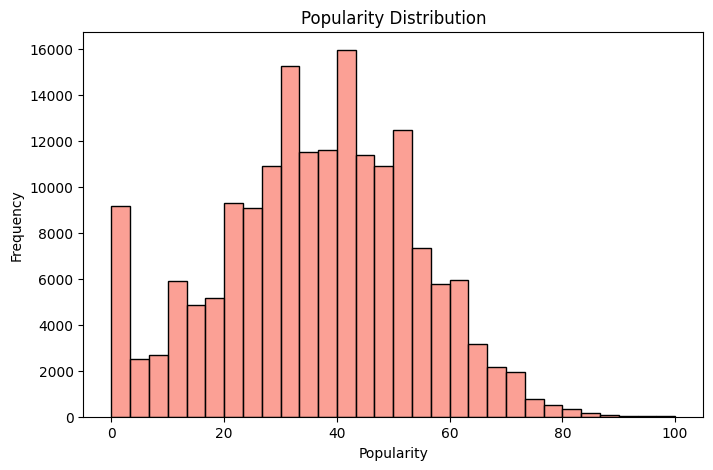

In [559]:
plt.figure(figsize=(8,5))
sns.histplot(df['popularity'], bins=30, kde=False, color='salmon')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

I plotted a histogram of song popularity scores from the dataset. The x-axis shows the popularity values (0–100), and the y-axis shows how many songs fall into each bin. I used 30 bins and colored the bars in salmon for better visualization. This chart shows that most songs have popularity scores between 20 and 60.

In [560]:
use_cols = [
    'acousticness','danceability','duration_ms','energy','instrumentalness',
    'liveness','loudness','speechiness','tempo','valence','key','mode','time_signature']
df_fix = df[use_cols + ['popularity']].copy()

df_fix['time_signature'] = df_fix['time_signature'].astype(str).str.split('/').str[0]
if df_fix['mode'].dtype == 'O':
    df_fix['mode'] = df_fix['mode'].map({'Minor': 0, 'Major': 1})
df_fix = pd.get_dummies(df_fix, columns=['key'], prefix='key', drop_first=True)

y = df_fix['popularity'].values
X_df = df_fix.drop(columns=['popularity']).apply(pd.to_numeric, errors='coerce')
X_df = X_df.fillna(X_df.median(numeric_only=True))

genres = df.loc[X_df.index, 'genre']

X_train_df, X_test_df, y_train, y_test, genres_train, genres_test = train_test_split(X_df, y, genres, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df.values)
X_test  = scaler.transform(X_test_df.values)
print("Shapes:", X_train.shape, X_test.shape)

Shapes: (141419, 23) (35355, 23)


I prepared this dataset by selecting the main audio features and the target variable popularity. And I was trying to fix formatting issues like converting time_signature to numeric form and mapping mode to 0/1. I also applied one-hot encoding to the key column so the model can work with it. Then I split the data into training and testing sets and scaled the features, ending up with 141,419 training samples and 35,355 test samples across 23 features.

In [561]:
# Neural Network architecture
class SpotifyNet(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(SpotifyNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

I built a simple neural network called SpotifyNet to predict song popularity. It has one hidden layer with 64 neurons and a ReLU activation function. The final output layer has a single neuron that produces the predicted popularity score.

In [562]:
model = SpotifyNet(input_dim=X_train.shape[1], hidden_dim=64)

Here I created an instance of my SpotifyNet model. I set the input dimension equal to the number of features in my training data and used 64 hidden units. This prepares the model to start learning from the dataset.

In [563]:
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_pred = model(X_test_tensor)

    y_pred = y_pred.numpy().flatten()
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Neural Net RMSE:", nn_rmse)

Neural Net RMSE: 40.337045882263276


I put my model into evaluation mode and disabled gradient tracking. I passed the test data through the neural network to generate predictions, then converted them back to NumPy.

In [564]:
# Baseline: predict mean popularity
mean_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(((mean_pred - y_test) ** 2).mean())
print("Baseline RMSE:", baseline_rmse)
print("NN RMSE:", nn_rmse)

Baseline RMSE: 17.418086367654553
NN RMSE: 40.337045882263276


I built a simple baseline model that always predicts the average popularity from the training set. Then I calculated its RMSE to see how it compares with the neural network. This gives me a reference point to check if my NN is actually learning something useful.

Per-genre RMSE:
 genre
Children's Music     8.905549
A Capella           10.906199
Opera               15.816401
Movie               17.301038
Comedy              23.076346
Anime               25.910213
Ska                 29.660185
Classical           32.534913
Soundtrack          34.640883
Blues               35.159848
dtype: float64


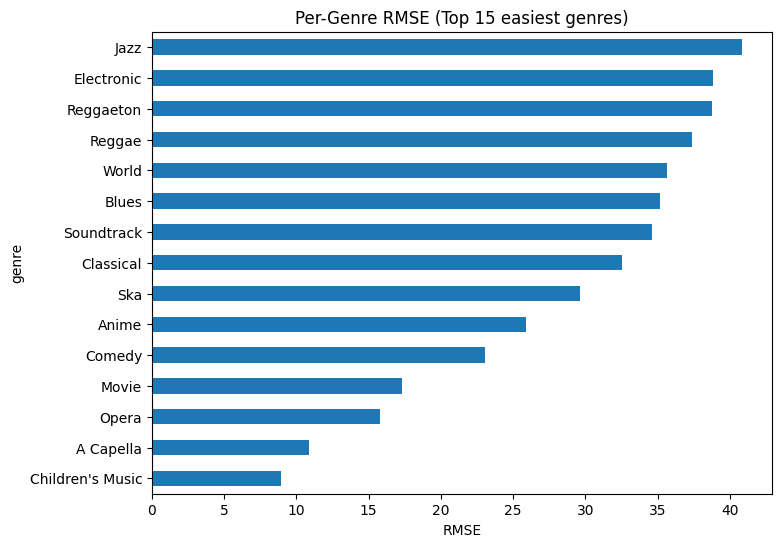

In [565]:
test_df = pd.DataFrame({"genre": genres_test.values,"predicted": y_pred,"actual": y_test})

genre_errors = (test_df.groupby("genre")[["predicted", "actual"]].apply(lambda g: np.sqrt(((g["predicted"] - g["actual"])**2).mean())).sort_values())
print("Per-genre RMSE:\n", genre_errors.head(10))

genre_errors.head(15).plot(kind="barh", figsize=(8,6))
plt.xlabel("RMSE")
plt.title("Per-Genre RMSE (Top 15 easiest genres)")
plt.show()

I created a dataframe to compare predicted vs actual popularity for each genre. Then grouped the data by genre and calculated the RMSE for each group. Finally, I plotted the 15 genres with the lowest RMSE to see which ones the neural network predicts most accurately.

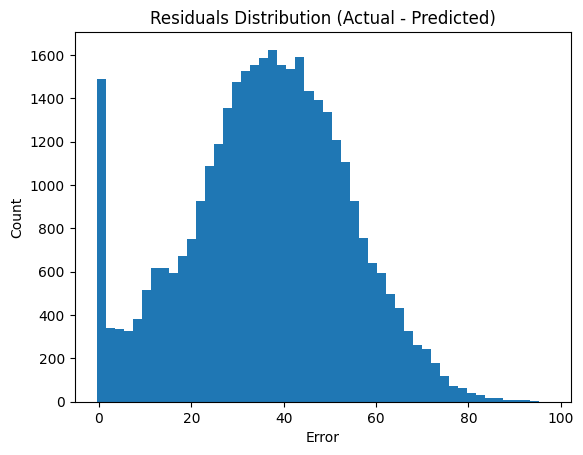

In [566]:
residuals = y_test - y_pred

plt.hist(residuals, bins=50)
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Error")
plt.ylabel("Count")
plt.show()

Here I calculated the residuals, like the difference between actual and predicted popularity. Then plotted them in a histogram to visualize how the errors are distributed. This helps check if the model tends to underpredict or overpredict and whether the errors are spread evenly or skewed.

In [567]:
def predict_popularity(new_song_features, model, scaler):
    """
    new_song_features: 1D array or list with same order of features as X
    model: trained PyTorch model
    scaler: fitted StandardScaler
    """
    scaled = scaler.transform([new_song_features])
    tensor = torch.tensor(scaled, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        pred = model(tensor).item()
    return pred

example_raw = X_test_df.iloc[0].values
prediction = predict_popularity(example_raw, model, scaler)
prediction = float(np.clip(prediction, 0, 100))
print("Predicted popularity:", prediction)

Predicted popularity: 0.0


I created a helper function predict_popularity that takes new song features, scales them with the fitted StandardScaler, and runs them through my trained PyTorch model to generate a prediction. Then tested it using the first row from my test set (X_test_df.iloc[0]). Finally, I clipped the result to stay between 0 and 100 and printed the predicted popularity score.